## 당뇨병 데이터셋 
Pregnancies : 임신 횟수

Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

BloodPressure : 이완기 혈압 (mm Hg)

SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값

Insulin : 2시간 혈청 인슐린 (mu U / ml)

BMI : 체질량 지수 (체중kg / 키(m)^2)

DiabetesPedigreeFunction : 당뇨병 혈통 기능

Age : 나이

Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

In [105]:
#필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
# 당뇨병 데이터셋 가져오고, 행/열 확인하기
data=pd.read_csv('C:/Users/minmi/Downloads/diabetes.csv')
data.shape

(768, 9)

## 당뇨병 데이터셋 전처리

In [107]:
#데이터 요약 정보
data.info() 
#모든 열이 768로 동일함=> 결측치가 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [108]:
data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Pregnancies', ylabel='Count'>

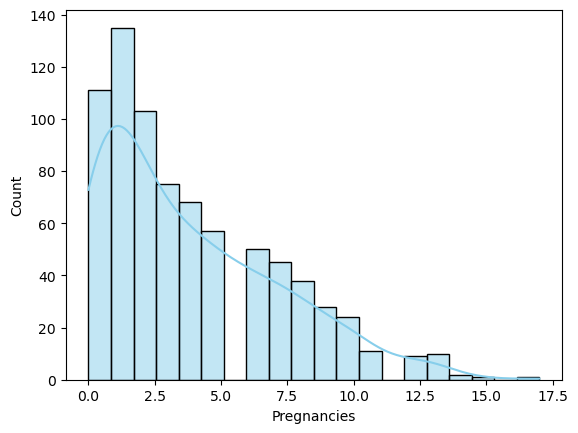

In [109]:
#Pregnancies 분포 확인
sns.histplot(data['Pregnancies'], kde=True, bins=20, color='skyblue')
#대부분의 값이 0~6에 분포
#임신횟수가 높은 값은 이상치일 가능성이 있으므로 IQR로 제거한다.

<Axes: xlabel='Pregnancies', ylabel='Count'>

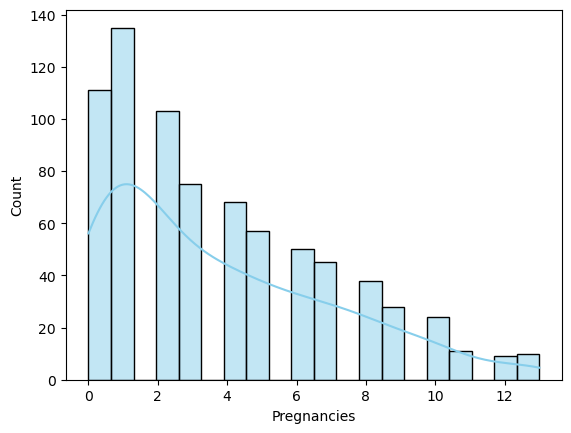

In [110]:
Q1 = data['Pregnancies'].quantile(0.25)
Q3 = data['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR  

data = data[(data['Pregnancies'] >= lower_bound) & (data['Pregnancies'] <= upper_bound)]

data.shape #4개가 이상치로 제거됨

sns.histplot(data['Pregnancies'], kde=True, bins=20, color='skyblue')

<Axes: xlabel='Glucose', ylabel='Count'>

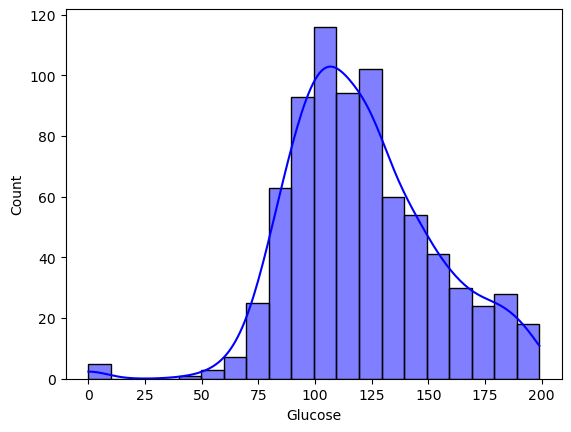

In [111]:
#Glucose 분포 확인
sns.histplot(data['Glucose'], kde=True, bins=20, color='blue')
#대체적으로 정규분포에 가까운 형태를 가짐
#혈당은 0값이 존재할 수 없기에 결측값으로 간주하고 처리한다.

<Axes: xlabel='Glucose', ylabel='Count'>

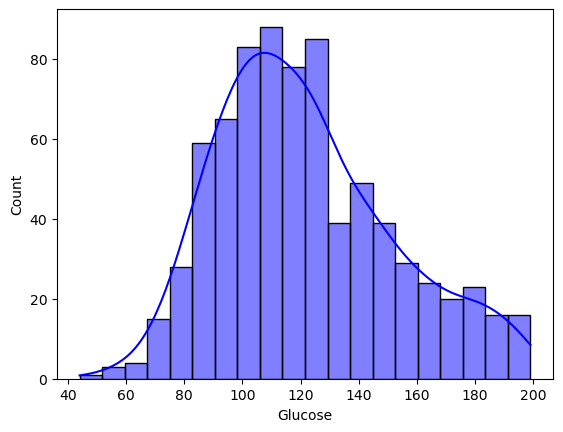

In [112]:
#0의 값을 중앙값으로 대체함 ->오른쪽 꼬리가 조금 길기에 중앙값이 더 적합
glucose_median = data['Glucose'].median()
data['Glucose'] = data['Glucose'].replace(0, glucose_median)
#분포 확인
sns.histplot(data['Glucose'], kde=True, bins=20, color='blue')

In [113]:
#이상치 확인
Q1 = data['Glucose'].quantile(0.25)
Q3 = data['Glucose'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

#min&max에 해당하는 값이 없으므로 이상치 제거할 필요없음

37.5
201.5


<Axes: xlabel='BloodPressure', ylabel='Count'>

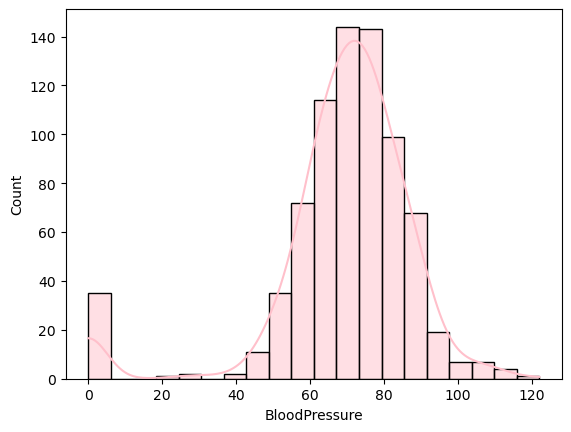

In [114]:
#BloodPressure 분포 확인
sns.histplot(data['BloodPressure'], kde=True, bins=20, color='pink')
#대체적으로 0을 제거하면 정규분포에 가까운 형태를 가짐
#혈압은 0값이 존재할 수 없기에 결측값으로 간주하고 처리한다.

<Axes: xlabel='BloodPressure', ylabel='Count'>

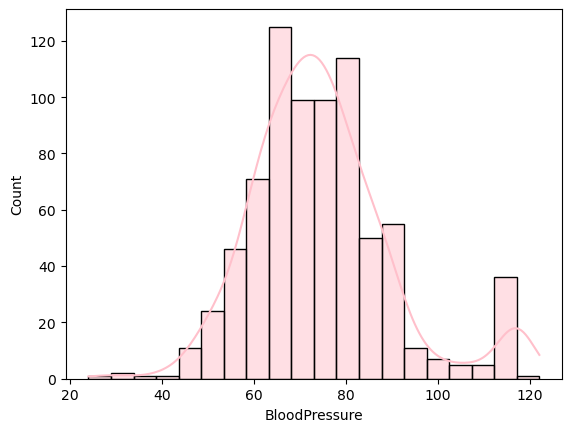

In [115]:
#0값 처리->  중앙값으로 대체
bp_median = data['BloodPressure'].median()
data['BloodPressure'] = data['BloodPressure'].replace(0, glucose_median)
#분포 확인
sns.histplot(data['BloodPressure'], kde=True, bins=20, color='pink')

<Axes: xlabel='BloodPressure', ylabel='Count'>

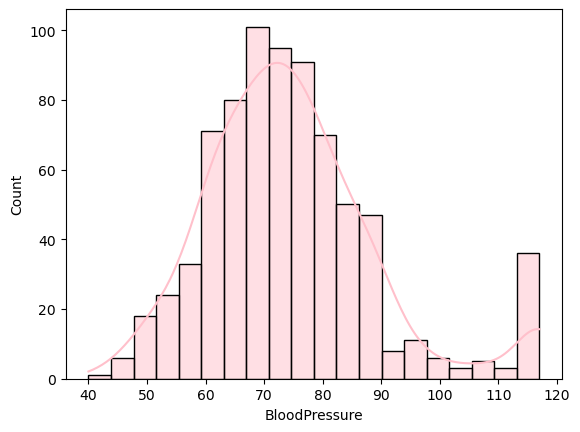

In [116]:
#대체적으로 혈압은 40미만, 120이상이면 비정상으로 판단하기에 이에 해당하는 값을 제거해준다.
data = data[(data['BloodPressure'] >= 40) & (data['BloodPressure'] <= 120)]
#제거 후 분포 확인
sns.histplot(data['BloodPressure'], kde=True, bins=20, color='pink')

<Axes: xlabel='SkinThickness', ylabel='Count'>

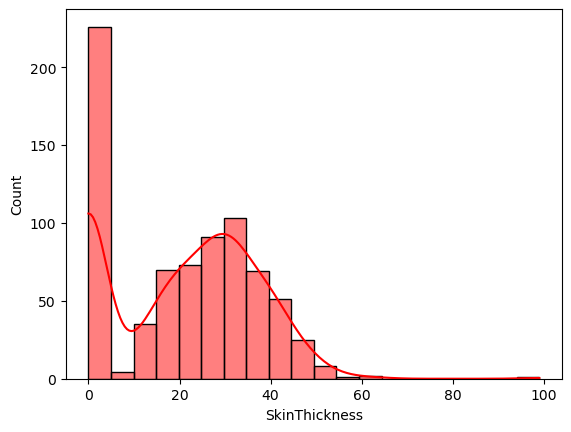

In [117]:
#SkinThickness 분포 확인
sns.histplot(data['SkinThickness'], kde=True, bins=20, color='red')
#피부두께는 0값이 존재할 수 없기에 결측값으로 간주하고 처리한다.

<Axes: xlabel='SkinThickness', ylabel='Count'>

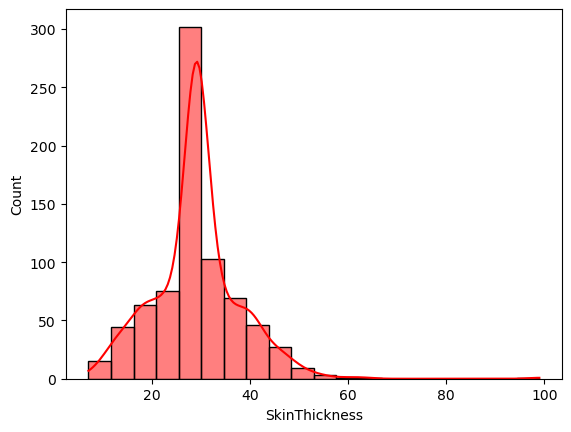

In [118]:
#0값 처리 -> 중앙값으로 대체
skinthickness_median = data['SkinThickness'][data['SkinThickness'] != 0].median()
data['SkinThickness'] = data['SkinThickness'].replace(0, skinthickness_median)
#분포 확인
sns.histplot(data['SkinThickness'], kde=True, bins=20, color='red')

<Axes: xlabel='SkinThickness', ylabel='Count'>

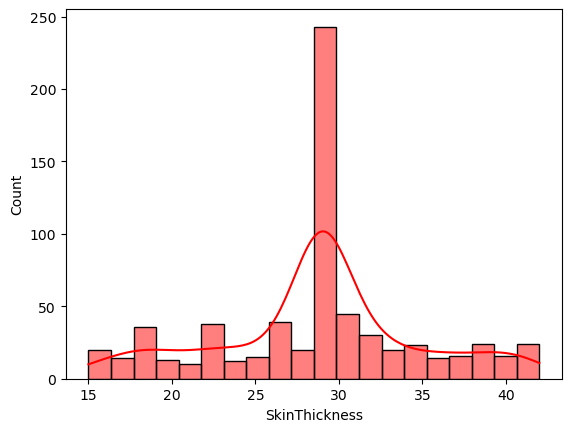

In [119]:
#일부 극단적인 값 존재 -> IQR로 이상치를 제거한다.
Q1 = data['SkinThickness'].quantile(0.25)
Q3 = data['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['SkinThickness'] >= lower_bound) & (data['SkinThickness'] <= upper_bound)]
sns.histplot(data['SkinThickness'], kde=True, bins=20, color='red')

<Axes: xlabel='Insulin', ylabel='Count'>

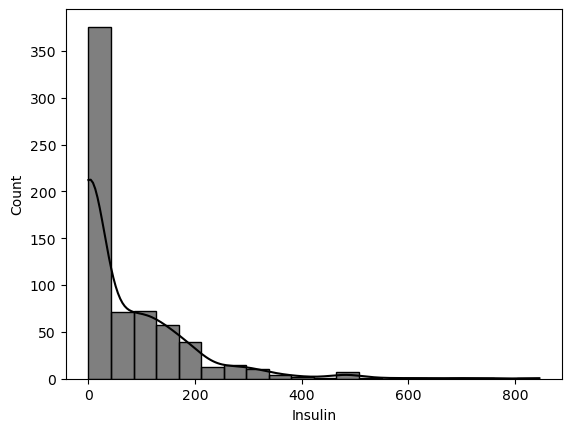

In [120]:
#Insulin 분포 확인
sns.histplot(data['Insulin'], kde=True, bins=20, color='black')
#인슐린은 0값이 존재할 수 없기에 결측값으로 간주하고 처리한다.

<Axes: xlabel='Insulin', ylabel='Count'>

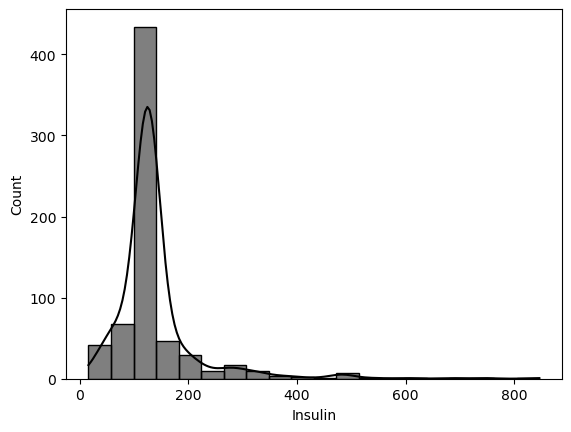

In [121]:
#0값 처리 -> 중앙값으로 대체
insulin_median = data['Insulin'][data['Insulin'] != 0].median()
data['Insulin'] = data['Insulin'].replace(0, insulin_median)
#분포 확인
sns.histplot(data['Insulin'], kde=True, bins=20, color='black')

<Axes: xlabel='Insulin', ylabel='Count'>

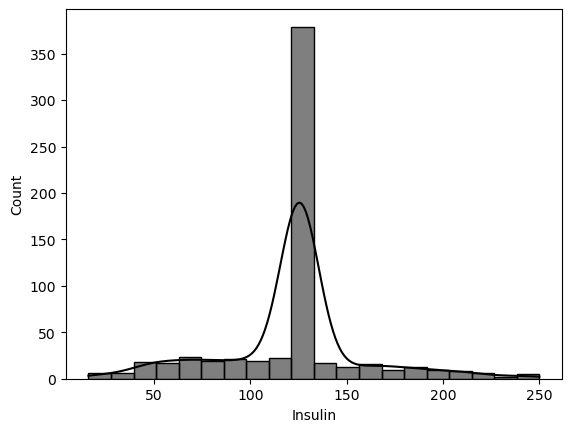

In [122]:
# 대부분값 몰려있으므로 도메인 지식을 기반으로 최솟값과 최댓값 설정
#IQR로 제거시 값이 대부분 제거됨
min_insulin_value = 2
max_insulin_value = 250

# 이상치 제거
data = data[(data['Insulin'] >= min_insulin_value) & (data['Insulin'] <= max_insulin_value)]

sns.histplot(data['Insulin'], kde=True, bins=20, color='black')

<Axes: xlabel='BMI', ylabel='Count'>

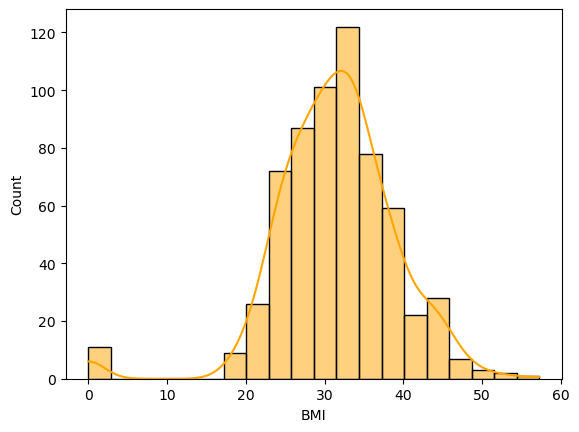

In [123]:
#BMI 분포 확인
sns.histplot(data['BMI'], kde=True, bins=20, color='orange')
#0값은 결측치를 의미하기에 0값은 제거하도록 한다.

<Axes: xlabel='BMI', ylabel='Count'>

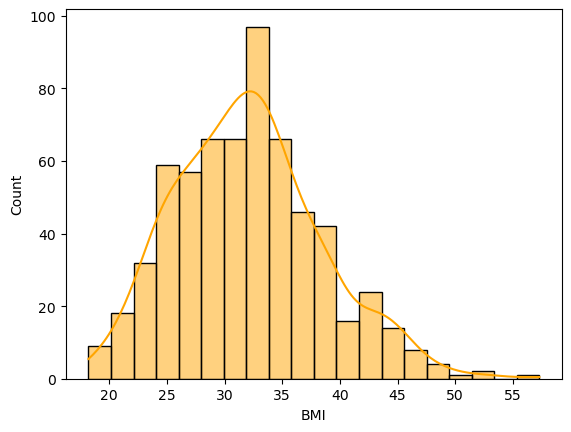

In [124]:
#0값 -> 중앙값 대체
bmi_median = data['BMI'][data['BMI'] != 0].median()
data['BMI'] = data['BMI'].replace(0, bmi_median)
#분포 확인
sns.histplot(data['BMI'], kde=True, bins=20, color='orange')

In [125]:
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


15.050000000000004
48.24999999999999


일반적인 BMI의 정상 범위:
- 정상: 18.5 ~ 24.9
- 과체중: 25 ~ 29.9
- 비만: 30 이상
- 심각한 비만: 40 이상

upper값이 통계적으로는 드문 값이지만, 도메인 지식 상에서는 반드시 이상치로 간주되지는 않는다.
다만 **로지스틱 회귀 모델은 극단적인 값에 영향을 많이 받는 모델이기에 제거한다.**

<Axes: xlabel='BMI', ylabel='Count'>

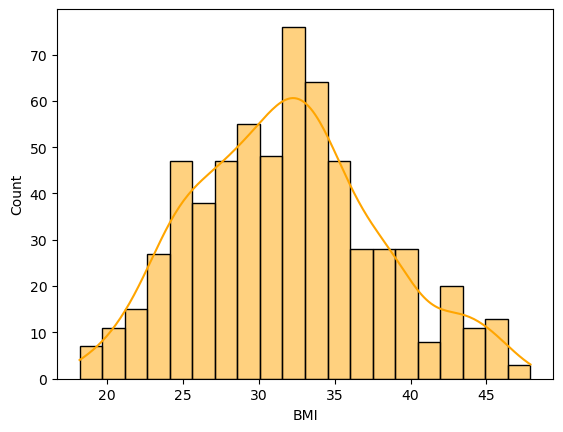

In [126]:
#이상치 제거
data = data[(data['BMI'] >= lower_bound) & (data['BMI'] <= upper_bound)]
sns.histplot(data['BMI'], kde=True, bins=20, color='orange')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

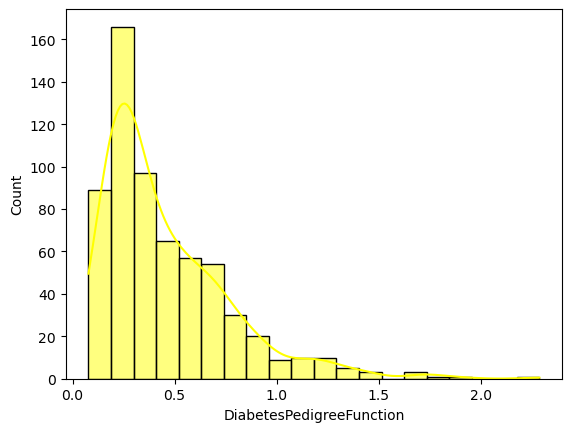

In [127]:
#DiabetesPedigreeFunction 분포 확인
sns.histplot(data['DiabetesPedigreeFunction'], kde=True, bins=20, color='yellow')


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

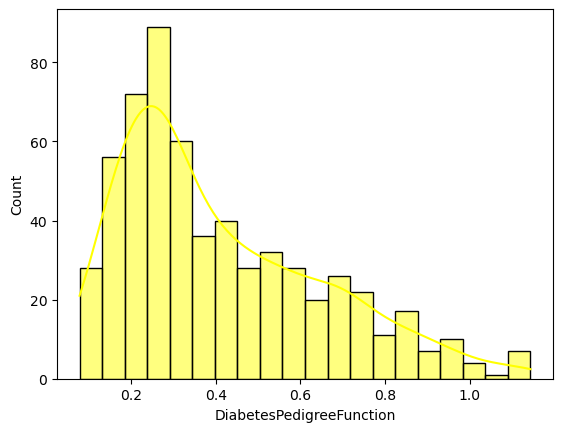

In [128]:
#IQR로 이상치 제거
Q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = data['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['DiabetesPedigreeFunction'] >= lower_bound) & (data['DiabetesPedigreeFunction'] <= upper_bound)]
sns.histplot(data['DiabetesPedigreeFunction'], kde=True, bins=20, color='yellow')


<Axes: xlabel='Age', ylabel='Count'>

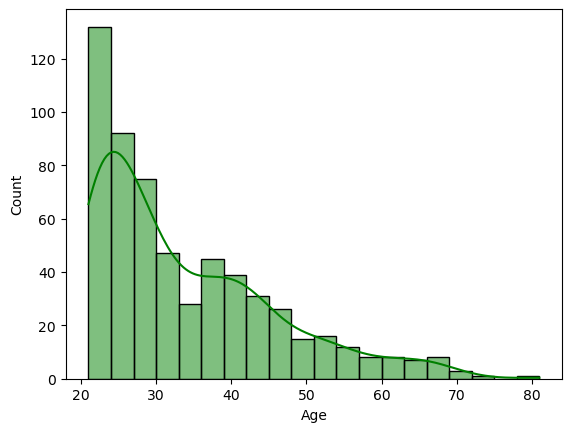

In [129]:
#age분포 확인
sns.histplot(data['Age'], kde=True, bins=20, color='green')
#이상치 없다고 판단.

<Axes: xlabel='Outcome', ylabel='count'>

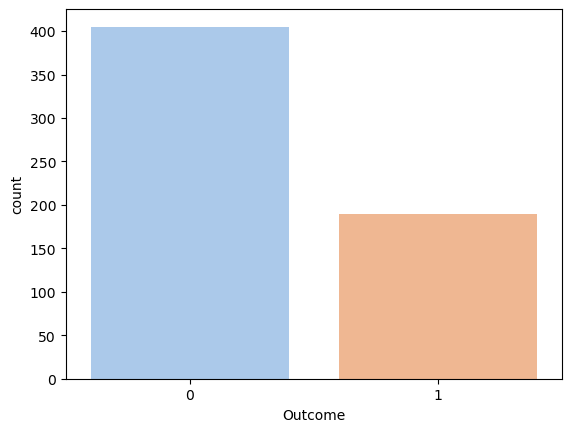

In [130]:
#outcome 분포 확인
sns.countplot(x=data['Outcome'], palette='pastel')

In [131]:
#전처리 후 행/열 확인
data.shape 

(594, 9)

## 로지스틱 회귀모델

In [132]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125.5,33.6,0.627,50,1
1,1,85,66,29,125.5,26.6,0.351,31,0
2,8,183,64,29,125.5,23.3,0.672,32,1


In [133]:
#outcome 값 확인
data['Outcome'].value_counts()

0    405
1    189
Name: Outcome, dtype: int64

In [135]:
#학습, 예측 데이터셋 나누기- 80%학습 데이터
split_count =int(data.shape[0]*0.8)
split_count

475

In [136]:
#힉습데이터
train=data[:split_count].copy()
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125.5,33.6,0.627,50,1
1,1,85,66,29,125.5,26.6,0.351,31,0
2,8,183,64,29,125.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
5,5,116,74,29,125.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
611,3,174,58,22,194.0,32.9,0.593,36,1
613,6,105,80,28,125.5,32.5,0.878,26,0
614,11,138,74,26,144.0,36.1,0.557,50,1
615,3,106,72,29,125.5,25.8,0.207,27,0


In [137]:
#훈련 데이터
test=data[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
619,0,119,117,29,125.5,32.4,0.141,24,1
620,2,112,86,42,160.0,38.4,0.246,28,0
623,0,94,70,27,115.0,43.5,0.347,21,0
624,2,108,64,29,125.5,30.8,0.158,21,0
626,0,125,68,29,125.5,24.7,0.206,21,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,29,125.5,22.5,0.142,33,0
764,2,122,70,27,125.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,29,125.5,30.1,0.349,47,1


In [138]:
#outcome만 제거하고 나열
feature_names=train.columns[:-1].tolist() 
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [139]:
#예측해야될 값-outcome
label_name=train.columns[-1]
label_name

'Outcome'

In [140]:
#학습, 예측 데이터셋 만들기
#train 데이터셋 (8개 칼럼)
X_train=train[feature_names]
print(X_train.shape)
X_train.head()

(475, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,125.5,33.6,0.627,50
1,1,85,66,29,125.5,26.6,0.351,31
2,8,183,64,29,125.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
5,5,116,74,29,125.5,25.6,0.201,30


In [141]:
#train 데이터셋 (1개 칼럼)
y_train=train[label_name]
y_train.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [142]:
#test 데이터셋 (8개 칼럼)
X_test=test[feature_names]
print(X_test.shape)
X_test.head()

(119, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
619,0,119,117,29,125.5,32.4,0.141,24
620,2,112,86,42,160.0,38.4,0.246,28
623,0,94,70,27,115.0,43.5,0.347,21
624,2,108,64,29,125.5,30.8,0.158,21
626,0,125,68,29,125.5,24.7,0.206,21


In [143]:
#test 데이터셋 (1개 칼럼)
y_test=test[label_name]
y_test

#X_train, X_test, y_train, y_test = train_test_split()을 통해서도 분할 가능

619    1
620    0
623    0
624    0
626    0
      ..
762    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 119, dtype: int64

In [144]:
#스케일링 하기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
#로지스틱 회귀 모델 학습
clf = LogisticRegression(max_iter=1000) #반복 횟수
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [146]:
#예측
y_pred = clf.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [147]:
#혼동 행렬: 예측 결과를 실제값과 비교
print(confusion_matrix(y_test, y_pred))
#TN=70, FP=9, FN=23, TP=17

[[69 10]
 [24 16]]


In [148]:
#정확도/ 재현율/ f1스코어
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        79
           1       0.62      0.40      0.48        40

    accuracy                           0.71       119
   macro avg       0.68      0.64      0.64       119
weighted avg       0.70      0.71      0.70       119



In [149]:
#피처 중요도 계산
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': clf.coef_[0]
})
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)
#DiabetesPedigreeFunction가 높은 중요도를 가짐


Feature Importance:
                    Feature  Coefficient  Importance
1                   Glucose     1.058270    1.058270
5                       BMI     0.567173    0.567173
6  DiabetesPedigreeFunction     0.353972    0.353972
0               Pregnancies     0.268722    0.268722
4                   Insulin     0.220211    0.220211
2             BloodPressure     0.173252    0.173252
3             SkinThickness     0.125495    0.125495
7                       Age     0.020588    0.020588


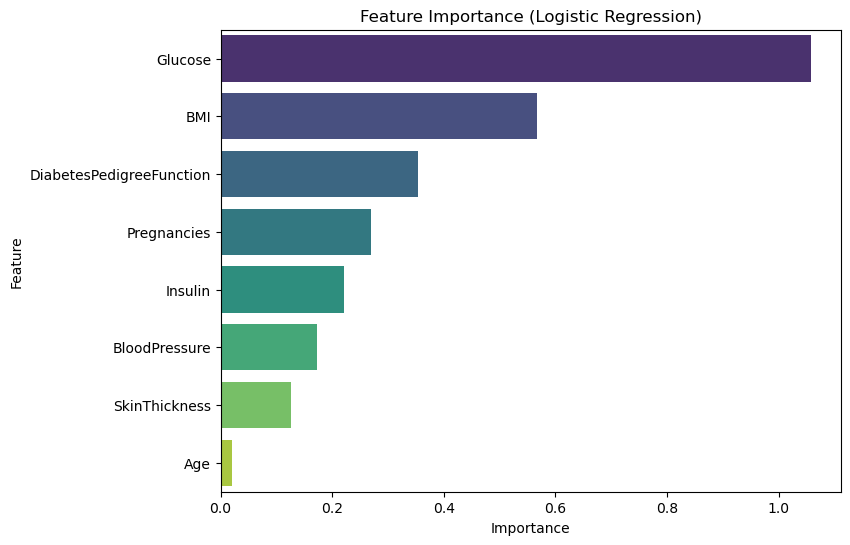

In [150]:
#피처 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Logistic Regression)')
plt.show()